# Imports and preparation

In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
from tqdm import tqdm

In [3]:
import time, gc

In [4]:
import importlib

In [5]:
from pathlib import Path

In [6]:
from util import util_elastic

OpenAI tiktoken module is not available for Python < 3.8,Linux ARM64 and AARCH64. Falling back to GPT2TokenizerFast.


In [7]:
from util import util_pipeline

In [8]:
# Para ter repetibilidade nos resultados
random_state = 1

# Tratar valores infinitos (+ e -) como np.NaN
pd.options.mode.use_inf_as_na = True

# IMPORTANTE para tornar figuras interativas
# %matplotlib notebook

# Tamanho padrão das figuras
figsize=(10,6)

pd.set_option('display.max_row', 1000)

pd.set_option('display.max_columns', 50)

pd.set_option('display.column_space', 40)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.width', 200)


# Create reference to index (elastic search)

In [9]:
index_dict = util_elastic.return_indexes('indir', parm_print=True)

Index: indir_juris_tcu
{'health': 'yellow', 'status': 'open', 'index': 'indir_juris_tcu', 'uuid': 'RD_aAWppQH6vjNxKUdL_0w', 'pri': '1', 'rep': '1', 'docs.count': '16045', 'docs.deleted': '16045', 'store.size': '334.9mb', 'pri.store.size': '334.9mb'}

Index: indir_juris_tcu_index
{'health': 'yellow', 'status': 'open', 'index': 'indir_juris_tcu_index', 'uuid': 'fGjzBrQzRUWTZ6KlnbfLqw', 'pri': '1', 'rep': '1', 'docs.count': '13255', 'docs.deleted': '2755', 'store.size': '281.7mb', 'pri.store.size': '281.7mb'}



In [10]:
index_dict

{'indir_juris_tcu': {'health': 'yellow',
  'status': 'open',
  'index': 'indir_juris_tcu',
  'uuid': 'RD_aAWppQH6vjNxKUdL_0w',
  'pri': '1',
  'rep': '1',
  'docs.count': '16045',
  'docs.deleted': '16045',
  'store.size': '334.9mb',
  'pri.store.size': '334.9mb'},
 'indir_juris_tcu_index': {'health': 'yellow',
  'status': 'open',
  'index': 'indir_juris_tcu_index',
  'uuid': 'fGjzBrQzRUWTZ6KlnbfLqw',
  'pri': '1',
  'rep': '1',
  'docs.count': '13255',
  'docs.deleted': '2755',
  'store.size': '281.7mb',
  'pri.store.size': '281.7mb'}}

In [11]:
INDEX_NAME = 'indir_juris_tcu'

In [12]:
index = util_elastic.return_index(parm_index_name=INDEX_NAME)


Qtd de documentos 16045

Qtd de embeddings 16045

Documento.id=5: <Document: id=5, content='SÚMULA TCU 1: Não se compreendem como vencimento, para efeito de concessão da pensão especial com fu...'>


# Teste de Busca

In [13]:
# Test query
# parm_query = "trata-se de uma denúncia contra o prefeito de Manhuaçu por não haver pago os funcionários da área de limpeza urbana"
parm_query = "técnica e preço"

In [14]:
# se precisar reload
importlib.reload(util_pipeline)

<module 'util.util_pipeline' from '/home/borela/fontes/ind-ir/code/util/util_pipeline.py'>

In [15]:
%%time
pipe = util_pipeline.return_pipeline_bm25(index)

CPU times: user 548 µs, sys: 52 µs, total: 600 µs
Wall time: 597 µs


In [16]:
%%time
doctos_retornados = pipe.run(query=parm_query, 
 params={"Retriever": {"top_k": 1000}})


CPU times: user 13.5 ms, sys: 3.72 ms, total: 17.2 ms
Wall time: 449 ms


In [17]:
doctos_retornados.keys()

dict_keys(['documents', 'root_node', 'params', 'query', 'node_id'])

In [18]:
doctos_retornados['documents'][0]

<Document: {'content': 'Nas licitações do tipo técnica e preço, a atribuição de pontuação distinta para técnica e preço demanda justificativa.', 'content_type': 'text', 'score': 0.829135766057232, 'meta': {'area_name': 'Licitação', 'num_tokens_monot5_3b': 33, 'normative_author_name': 'AUGUSTO SHERMAN', 'normative_date': '2011-03-02', 'normative_author_type': 'RELATOR', 'normative_process_type': 'DENÚNCIA', 'num_word': 18, 'reference_list': '', 'paradigmatic': '', 'area_id_descriptor': 932, 'len_text_char_log': 5, 'num_tokens_minilm': 25, 'id': 20870, 'normative_identification': 'Acórdão 546/2011 - Plenário', 'len_text_char': 118}, 'id_hash_keys': ['content'], 'embedding': None, 'id': '20870'}>

In [19]:
util_pipeline.detail_document_found(doctos_retornados)

Parâmetros usados: {'Retriever': {'top_k': 1000}}
Consulta: técnica e preço
Qtd documentos retornados: 1000
Primeiro docto:
<Document: id=20870, content='Nas licitações do tipo técnica e preço, a atribuição de pontuação distinta para técnica e preço dema...'>

Último (1000):
<Document: id=19476, content='Estende-se aos membros do Tribunal de Contas da União e do Ministério Público junto ao Tribunal o di...'>
Seguem os nomes dos termos recuperados em ordem de score
0 : [0.829135766057232, '20870', 'Nas licitações do tipo técnica e preço, a atribuição de pontuação distinta para técnica e preço demanda justificativa.']
1 : [0.8155024511903081, '53641', 'Em licitações do tipo técnica e preço com preponderância da proposta técnica, os fatores de ponderação entre técnica e preço deverão ser expressamente fundamentados, a fim de evidenciar sua razoabilidade e demonstrar que não representam privilégio ou proporcionam aumento indevido de preço em decorrência de diferenças técnicas não substanci

        pipe options
        util_pipeline.return_pipeline_sts_multihop(index)
        util_pipeline.return_pipeline_join(index)
        util_pipeline.return_pipeline_sts_multihop_reranker(index, 'MONOT5', parm_limit_query_size=350)
        util_pipeline.return_pipeline_join_reranker(index, 'MONOT5', parm_limit_query_size=350)
        util_pipeline.return_pipeline_bm25_reranker(index, 'MONOT5', parm_limit_query_size=350)
        util_pipeline.return_pipeline_bm25_reranker(index, 'MINILM', parm_limit_query_size=350)
        util_pipeline.return_pipeline_sts_reranker(index, 'MINILM', parm_limit_query_size=350)
        util_pipeline.return_pipeline_sts_reranker(index, 'MONOT5', parm_limit_query_size=350)

imprimir o pipe

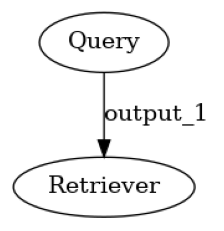

In [20]:
util_pipeline.print_pipe_image(pipe)

In [21]:
# pipe.save_to_yaml(Path("pipe_join_ranker_monot5_3b.yahml"), return_defaults = True)


# Preparação dos dados

## Carga dos documentos

In [22]:
df_docs = pd.read_csv('../data/juris_tcu/doc.csv', index_col='ID')[['TEXT']]
df_docs

,TEXT
ID,
13568,"É ilegal a contagem de tempo ficto de serviço prestado sob a égide da Lei 3.313/1957, proporcion..."
11614,"SÚMULA TCU 283: Para fim de habilitação, a Administração Pública não deve exigir dos licitantes ..."
21087,"A contratação de serviços por preços superiores às referências legais (Sinapi e Sicro) deve ser,..."
35016,"Não se aplica, excepcionalmente, multa aos gestores por grave infração à norma legal se a irregu..."
29370,"Em contratatações de TI, não cabe aceitar propostas de preço com incidência de encargos majorado..."
...,...
55,"SÚMULA TCU 51: Quando, no exame e julgamento das contas de responsáveis por bens, valores e dinh..."
95,"SÚMULA TCU 91: A falta de remessa, em tempo hábil e para os devidos fins, aos órgãos competentes..."
94,"SÚMULA TCU 90: O Parecer Prévio, em sentido favorável, emitido pelo Tribunal de Contas da União,..."


In [23]:
doc_content = df_docs.to_dict()['TEXT']
for id in sorted(list(doc_content.keys()))[5:450:80]:
    print(id, '-', doc_content[id])

10 - SÚMULA TCU 6: As empresas públicas estão sujeitas à prestação de contas da gestão anual de seus administradores, perante o Tribunal de Contas, independentemente de dispositivo de lei ordinária que o estabeleça.
101 - SÚMULA TCU 97: Ressalvada a hipótese prevista no parágrafo único do art. 3º da Lei nº 5.645, de 10/12/70 (Decretolei nº 200, de 25/02/67, art. 10, §§ 7º e 8º), não se admite, a partir da data da publicação do ato de implantação do novo Plano de Classificação e Retribuição de Cargos do Serviço Civil da União e das autarquias, a utilização de serviços de pessoal, mediante convênios, contratos ou outros instrumentos, celebrados com Fundações ou quaisquer entidades públicas ou privadas, para o desempenho de atividades inerentes às categorias funcionais abrangidas pelo referido Plano.
188 - SÚMULA TCU 184: Com o advento da Lei nº 6.903, de 30-04-81, o mandato de membro classista e temporário, nos órgãos da Justiça do Trabalho, configura-se como cargo público, para o fim de

## Carga das queries (query1, query2 e query3)

In [24]:
import pandas as pd

df_queries1 = pd.read_csv('../data/juris_tcu/query1.csv', sep=';', index_col='QUERY_ID')
df_queries1

,QUERY_TEXT
QUERY_ID,
1,técnica e preço
2,restos a pagar
3,aditivo a contrato
4,adesão a ata de registro de preços
5,sobrepreço e superfaturamento
6,restrição a competitividade
7,acréscimos e supressões
8,obras e serviços de engenharia
9,fiscalizacao de contratos


In [25]:
df_queries2 = pd.read_csv('../data/juris_tcu/query2.csv', sep=';', index_col='QUERY_ID')
df_queries2

,QUERY_TEXT
QUERY_ID,
51,concessão remunerada de uso de bens públicos modalidade
52,citação válida falecimento
53,garantia contratual patrimônio líquido mínimo
54,garantia de participação patrimônio líquido mínimo
55,despesas sem cobertura contratual multa
56,uso de áreas comerciais em aeroportos pregão
57,cessão das áreas comerciais de centrais públicas de abastecimento de gêneros alimentícios licitação
58,capacidade bens pertinentes e compatíveis com o objeto da licitação comprovação
59,extrapolação dos limites para alterações consensuais qualitativas de contratos de obras e serviços


In [26]:
df_queries3 = pd.read_csv('../data/juris_tcu/query3.csv', sep=';', index_col='QUERY_ID')
df_queries3

,QUERY_TEXT
QUERY_ID,
101,Qual é a modalidade de licitação adequada para a concessão remunerada de uso de bens públicos?
102,A citação é considerada válida após o falecimento do responsável se a defesa já foi apresentada?
103,A prestação de garantia contratual é permitida juntamente com a exigência de patrimônio líquido ...
104,A exigência de garantia de participação é permitida juntamente com a exigência de patrimônio líq...
105,Quais são as consequências para os responsáveis que realizam despesas sem cobertura contratual?
106,O pregão é adequado para concessões de uso de áreas comerciais em aeroportos?
107,Quais normas devem ser observadas na cessão das áreas comerciais de centrais públicas de abastec...
108,É necessário exigir ao licitante comprovar que já forneceu bens pertinentes e compatíveis com o ...
109,"É permitido a extrapolar os limites estabelecidos no art. 65, §§ 1º e 2º, da Lei 8.666/1993 para..."


In [27]:
df_queries = df_queries1.append(df_queries2).append(df_queries3)
df_queries

,QUERY_TEXT
QUERY_ID,
1,técnica e preço
2,restos a pagar
3,aditivo a contrato
4,adesão a ata de registro de preços
5,sobrepreço e superfaturamento
6,restrição a competitividade
7,acréscimos e supressões
8,obras e serviços de engenharia
9,fiscalizacao de contratos


In [28]:
query_text = df_queries.to_dict()['QUERY_TEXT']
list(query_text.items())[9::10]

[(10, 'diarias e passagens'),
 (20, 'auditoria interna'),
 (30, 'fiscal de contrato'),
 (40, 'multa a particulares'),
 (50, 'antecipação de pagamento'),
 (60, 'responsabilidade do gestor sucessor omissão do antecessor'),
 (70, 'SUS recursos União competência do TCU'),
 (80, 'reajuste de preços e repactuação'),
 (90, 'habilitação técnico-operacional obras e serviços de engenharia'),
 (100, 'assistência médica a servidores'),
 (110,
  'Qual a responsabilidade do gestor sucessor quando o gestor antecessor omitiu o dever de prestar contas?'),
 (120,
  'O TCU é responsável pela fiscalização das ações e serviços de saúde pagos com recursos repassados pela União no âmbito do Sistema Único de Saúde?'),
 (130, 'Qual é a diferença entre reajuste de preços e repactuação?'),
 (140,
  'Quais documentos são exigidos para habilitação técnico-operacional em certames de obras e serviços de engenharia?'),
 (150,
  'Qual é a regra geral para a contratação de entidade para prestação de serviços de assistê

## Execução das queries - BM25

In [ ]:
total = 0
result_BM25 = {}
for id, query in query_text.items():
    doctos_retornados = pipe.run(query=query, params={"Retriever": {"top_k": 1000}})
    result_BM25[id] = [int(doc.id) for doc in doctos_retornados['documents']]
    total += len(result_BM25[id])
    print(id, query, result_BM25[id][:10])
print(total, 'registros gerados.')    

In [ ]:
df_run_BM25 = pd.DataFrame(columns=['QUERY_ID', 'RANK', 'DOC_ID', 'ENGINE'])
i = 0
for query_id, docs in result_BM25.items():
    for rank, doc_id in enumerate(docs):
        df_run_BM25.loc[i] = (query_id, rank+1, doc_id, 'BM25')
        i += 1
        if i % 1000 == 0:
            print(str(i // 1000) + 'k registros processados /', str(total // 1000) + 'k.')

In [ ]:
df_run_BM25

In [ ]:
df_run_BM25.to_csv('../data/search/juris_tcu/run_bm25.csv', index=False)

## Execução das queries - similaridade

In [ ]:
pipe = util_pipeline.return_pipeline_sts(index)
doctos_retornados = pipe.run(query=parm_query, params={"Retriever": {"top_k": 100}})

In [ ]:
util_pipeline.detail_document_found(doctos_retornados)

In [ ]:
total = 0
result_sts = {}
for id, query in query_text.items():
    doctos_retornados = pipe.run(query=query, params={"Retriever": {"top_k": 500}})
    result_sts[id] = [int(doc.id) for doc in doctos_retornados['documents']]
    total += len(result_sts[id])
    print(id, query, result_sts[id][:10])
print(total, 'registros gerados.') 

In [ ]:
df_run_sts = pd.DataFrame(columns=['QUERY_ID', 'RANK', 'DOC_ID', 'ENGINE'])
i = 0
for query_id, docs in result_sts.items():
    for rank, doc_id in enumerate(docs):
        df_run_sts.loc[i] = (query_id, rank+1, doc_id, 'SentenceTransformerS')
        i += 1
        if i % 1000 == 0:
            print(str(i // 1000) + 'k registros processados /', str(total // 1000) + 'k.')

In [ ]:
df_run_sts

In [ ]:
df_run_sts.to_csv('../data/search/juris_tcu/run_sts.csv', index=False)

## Execução das queries - BM25 + rerank

In [29]:
pipe = util_pipeline.return_pipeline_bm25_reranker(index, parm_limit_query_size = 50)
doctos_retornados = pipe.run(query=parm_query, params={"Retriever": {"top_k": 10}})

In [30]:
util_pipeline.detail_document_found(doctos_retornados)

Parâmetros usados: {'Retriever': {'top_k': 10}}
Consulta: técnica e preço
Qtd documentos retornados: 10
Primeiro docto:
<Document: id=20592, content='Em licitações do tipo técnica e preço, a instituição contratante deve sempre justificar, respaldada ...'>

Último (10):
<Document: id=18324, content='Limitação das propostas de preço ao orçamento de referência da licitação é aplicável também às licit...'>
Seguem os nomes dos termos recuperados em ordem de score
0 : [-0.018339237198233604, '20592', 'Em licitações do tipo técnica e preço, a instituição contratante deve sempre justificar, respaldada em estudos técnicos, quando o peso do critério preço for inferior ao do critério técnica.']
1 : [-0.01995943859219551, '15740', 'Em licitações do tipo técnica e preço em que houver preponderância da proposta técnica, os fatores de ponderação entre técnica e preço devem ser expressamente fundamentados, a fim de evidenciar sua razoabilidade e demonstrar que não representam privilégio ou proporciona

In [32]:
total = 0
result_bm25_reranker = {}
for id, query in query_text.items():
    doctos_retornados = pipe.run(query=query, params={"Retriever": {"top_k": 300}})
    result_bm25_reranker[id] = [int(doc.id) for doc in doctos_retornados['documents']]
    total += len(result_bm25_reranker[id])
    print(id, query, result_bm25_reranker[id][:10])
print(total, 'registros gerados.') 

1 técnica e preço [21064, 42166, 13702, 20592, 15740, 53641, 31601, 54765, 20506, 47161]
2 restos a pagar [31437, 18105, 19340, 77959, 31274, 17289, 18452, 23161, 76612, 18432]
3 aditivo a contrato [18380, 18058, 17225, 31102, 17240, 32589, 20510, 57354, 41117, 18043]
4 adesão a ata de registro de preços [16895, 45015, 14526, 62306, 6237, 50537, 16981, 21201, 77927, 84935]
5 sobrepreço e superfaturamento [21172, 17816, 4066, 53003, 94290, 114656, 50616, 144170, 16277, 59226]
6 restrição a competitividade [7166, 8276, 19400, 125194, 33177, 59438, 52875, 104234, 5066, 16409]
7 acréscimos e supressões [67219, 109711, 134594, 5574, 17022, 32639, 18043, 17207, 18359, 18016]
8 obras e serviços de engenharia [32956, 100887, 33021, 135712, 42404, 31530, 21810, 20885, 21249, 20917]
9 fiscalizacao de contratos [31032, 19355, 43178, 18038, 84434, 18943, 21109, 66909, 40141, 88647]
10 diarias e passagens [30310, 33649, 32381, 30893, 30086, 30891, 28521, 30290, 14250, 31684]
11 bens e serviços comu

77 aquisição direta risco a saúde [17105, 17350, 14485, 16252, 107401, 18183, 131533, 31143, 141129, 20626]
78 pregão divulgação dos preços estimados no edital [14895, 71456, 17895, 17173, 19410, 19390, 13226, 18860, 67011, 14555]
79 instrutor treinamento inexigibilidade de licitação [34290, 31507, 32925, 34227, 18265, 18229, 34940, 18196, 51394, 17107]
80 reajuste de preços e repactuação [31108, 31104, 17821, 17262, 14814, 18390, 21100, 18047, 31080, 9751]
81 recomposição reajuste [42820, 42821, 31108, 17821, 41099, 31104, 18902, 64694, 17254, 42822]
82 retenção de pagamentos perda da regularidade fiscal [17220, 47911, 20569, 21104, 60736, 18386, 35189, 14882, 21253, 28071]
83 irregulares despesas desnecessárias e anteriores à celebração do contrato [33080, 33083, 33081, 33937, 31669, 32454, 31680, 22854, 31681, 69047]
84 vínculo trabalhista ou societário pré-existente competitividade das licitantes [22841, 21833, 22108, 26874, 80979, 63725, 18877, 22854, 18285, 85539]
85 técnica e pr

129 A contratação de professores, conferencistas ou instrutores para ministrar cursos de treinamento ou aperfeiçoamento de pessoal se enquadra na inexigibilidade de licitação? [31507, 34290, 32925, 32923, 32936, 19385, 18820, 31508, 18217, 31504]
130 Qual é a diferença entre reajuste de preços e repactuação? [31104, 31108, 42820, 17262, 9751, 31080, 45338, 21100, 123564, 23135]
131 É possível a aplicação da recomposição mesmo após a aplicação do reajuste previsto no contrato? [42821, 42820, 17254, 31931, 29601, 33801, 60811, 31108, 18338, 92208]
132 A retenção de pagamentos é permitida em caso de perda da regularidade fiscal? [17220, 20569, 47911, 18386, 21253, 13611, 60736, 28869, 21104, 17258]
133 Por que despesas desnecessárias e anteriores à celebração do contrato são consideradas irregulares? [33080, 33083, 33081, 32454, 33937, 31669, 69047, 69557, 31680, 22116]
134 Como o vínculo trabalhista ou societário pré-existente afeta a competitividade das licitantes no certame licitatório

In [33]:
df_run_bm25_reranker = pd.DataFrame(columns=['QUERY_ID', 'RANK', 'DOC_ID', 'ENGINE'])
i = 0
for query_id, docs in result_bm25_reranker.items():
    for rank, doc_id in enumerate(docs):
        df_run_bm25_reranker.loc[i] = (query_id, rank+1, doc_id, 'BM25+Reranker')
        i += 1
        if i % 1000 == 0:
            print(str(i // 1000) + 'k registros processados /', str(total // 1000) + 'k.')

1k registros processados / 44k.
2k registros processados / 44k.
3k registros processados / 44k.
4k registros processados / 44k.
5k registros processados / 44k.
6k registros processados / 44k.
7k registros processados / 44k.
8k registros processados / 44k.
9k registros processados / 44k.
10k registros processados / 44k.
11k registros processados / 44k.
12k registros processados / 44k.
13k registros processados / 44k.
14k registros processados / 44k.
15k registros processados / 44k.
16k registros processados / 44k.
17k registros processados / 44k.
18k registros processados / 44k.
19k registros processados / 44k.
20k registros processados / 44k.
21k registros processados / 44k.
22k registros processados / 44k.
23k registros processados / 44k.
24k registros processados / 44k.
25k registros processados / 44k.
26k registros processados / 44k.
27k registros processados / 44k.
28k registros processados / 44k.
29k registros processados / 44k.
30k registros processados / 44k.
31k registros proce

In [34]:
df_run_bm25_reranker

,QUERY_ID,RANK,DOC_ID,ENGINE
0,1,1,21064,BM25+Reranker
1,1,2,42166,BM25+Reranker
2,1,3,13702,BM25+Reranker
3,1,4,20592,BM25+Reranker
4,1,5,15740,BM25+Reranker
...,...,...,...,...
44178,150,296,38578,BM25+Reranker
44179,150,297,42490,BM25+Reranker
44180,150,298,26601,BM25+Reranker
44181,150,299,148773,BM25+Reranker


In [35]:
df_run_bm25_reranker.to_csv('../data/search/juris_tcu/run_bm25_reranker.csv', index=False)

## Execução das queries - similaridade vetorial + rerank

In [36]:
pipe = util_pipeline.return_pipeline_sts_reranker(index, parm_limit_query_size = 50)
doctos_retornados = pipe.run(query=parm_query, params={"Retriever": {"top_k": 10}})

In [37]:
util_pipeline.detail_document_found(doctos_retornados)

Parâmetros usados: {'Retriever': {'top_k': 10}}
Consulta: técnica e preço
Qtd documentos retornados: 10
Primeiro docto:
<Document: id=42166, content='Diante da complexidade e da natureza do objeto, com especificidades técnicas inéditas, de caráter em...'>

Último (10):
<Document: id=21901, content='A demonstração da capacidade técnico-operacional de execução de serviços deve-se restringir às parce...'>
Seguem os nomes dos termos recuperados em ordem de score
0 : [-0.015654532238841057, '42166', 'Diante da complexidade e da natureza do objeto, com especificidades técnicas inéditas, de caráter eminentemente intelectual deve ser adotada a licitação pelo tipo "técnica e preço".']
1 : [-0.03082876093685627, '34233', 'Os fatores de avaliação das propostas técnicas e de preços devem ser proporcionais ao grau de complexidade dos serviços.']
2 : [-0.05067525431513786, '34126', 'O peso dos fatores de avaliação da proposta técnica devem ser pertinentes com a representatividade de cada fator para 

In [38]:
total = 0
result_sts_reranker = {}
for id, query in query_text.items():
    doctos_retornados = pipe.run(query=query, params={"Retriever": {"top_k": 300}})
    result_sts_reranker[id] = [int(doc.id) for doc in doctos_retornados['documents']]
    total += len(result_sts_reranker[id])
    print(id, query, result_sts_reranker[id][:10])
print(total, 'registros gerados.') 

1 técnica e preço [21064, 42166, 13702, 20592, 15740, 53641, 31601, 20506, 47161, 20971]
2 restos a pagar [19340, 19636, 17258, 32865, 19773, 19743, 18395, 14052, 34296, 77243]
3 aditivo a contrato [18058, 17225, 31102, 20511, 32589, 20510, 57354, 18003, 20512, 18000]
4 adesão a ata de registro de preços [16895, 45015, 14526, 62306, 50537, 21201, 15092, 20561, 110879, 4230]
5 sobrepreço e superfaturamento [21172, 17816, 4066, 53003, 94290, 114656, 50616, 144170, 16277, 59226]
6 restrição a competitividade [7166, 8276, 19400, 33177, 59438, 52875, 104234, 17372, 16409, 22142]
7 acréscimos e supressões [67219, 109711, 134594, 17022, 5574, 18043, 20539, 17207, 18359, 18016]
8 obras e serviços de engenharia [32956, 135712, 42404, 31530, 21810, 20917, 20953, 53841, 14522, 22818]
9 fiscalizacao de contratos [31032, 19355, 79286, 32623, 43178, 18051, 18941, 21109, 18345, 35041]
10 diarias e passagens [30107, 32381, 32385, 30086, 30891, 32379, 30881, 30890, 25478, 33683]
11 bens e serviços comu

77 aquisição direta risco a saúde [17105, 104716, 67871, 17350, 14485, 16252, 18183, 17275, 20560, 18081]
78 pregão divulgação dos preços estimados no edital [14895, 71456, 17895, 17173, 19410, 13226, 18860, 67011, 14555, 32942]
79 instrutor treinamento inexigibilidade de licitação [34290, 31507, 32925, 31681, 18229, 34940, 25457, 16997, 11684, 14621]
80 reajuste de preços e repactuação [31108, 17821, 17262, 14814, 18390, 21100, 21101, 18047, 31080, 9751]
81 recomposição reajuste [42820, 42821, 31108, 17821, 9751, 68308, 14814, 18080, 31080, 34098]
82 retenção de pagamentos perda da regularidade fiscal [17220, 19340, 32471, 25995, 25331, 31926, 29548, 24629, 33763, 86164]
83 irregulares despesas desnecessárias e anteriores à celebração do contrato [33080, 33083, 33937, 31669, 32454, 31680, 22854, 15096, 15401, 98622]
84 vínculo trabalhista ou societário pré-existente competitividade das licitantes [22841, 21833, 22108, 26874, 80979, 63725, 16982, 22854, 18285, 85539]
85 técnica e preço

129 A contratação de professores, conferencistas ou instrutores para ministrar cursos de treinamento ou aperfeiçoamento de pessoal se enquadra na inexigibilidade de licitação? [31507, 34290, 32925, 19417, 18820, 31681, 32921, 18196, 18229, 18298]
130 Qual é a diferença entre reajuste de preços e repactuação? [31104, 31108, 17821, 42820, 17262, 9751, 31080, 18390, 21100, 18047]
131 É possível a aplicação da recomposição mesmo após a aplicação do reajuste previsto no contrato? [42821, 18416, 18080, 17206, 31080, 14814, 29601, 34116, 17821, 34269]
132 A retenção de pagamentos é permitida em caso de perda da regularidade fiscal? [17220, 33763, 18386, 14882, 21253, 28869, 31926, 32471, 25995, 86164]
133 Por que despesas desnecessárias e anteriores à celebração do contrato são consideradas irregulares? [32454, 33937, 31669, 98622, 69557, 31680, 22116, 19451, 53936, 23375]
134 Como o vínculo trabalhista ou societário pré-existente afeta a competitividade das licitantes no certame licitatório?

In [39]:
df_run_sts_reranker = pd.DataFrame(columns=['QUERY_ID', 'RANK', 'DOC_ID', 'ENGINE'])
i = 0
for query_id, docs in result_sts_reranker.items():
    for rank, doc_id in enumerate(docs):
        df_run_sts_reranker.loc[i] = (query_id, rank+1, doc_id, 'STS+Reranker')
        i += 1
        if i % 1000 == 0:
            print(str(i // 1000) + 'k registros processados /', str(total // 1000) + 'k.')

1k registros processados / 45k.
2k registros processados / 45k.
3k registros processados / 45k.
4k registros processados / 45k.
5k registros processados / 45k.
6k registros processados / 45k.
7k registros processados / 45k.
8k registros processados / 45k.
9k registros processados / 45k.
10k registros processados / 45k.
11k registros processados / 45k.
12k registros processados / 45k.
13k registros processados / 45k.
14k registros processados / 45k.
15k registros processados / 45k.
16k registros processados / 45k.
17k registros processados / 45k.
18k registros processados / 45k.
19k registros processados / 45k.
20k registros processados / 45k.
21k registros processados / 45k.
22k registros processados / 45k.
23k registros processados / 45k.
24k registros processados / 45k.
25k registros processados / 45k.
26k registros processados / 45k.
27k registros processados / 45k.
28k registros processados / 45k.
29k registros processados / 45k.
30k registros processados / 45k.
31k registros proce

In [40]:
df_run_sts_reranker

,QUERY_ID,RANK,DOC_ID,ENGINE
0,1,1,21064,STS+Reranker
1,1,2,42166,STS+Reranker
2,1,3,13702,STS+Reranker
3,1,4,20592,STS+Reranker
4,1,5,15740,STS+Reranker
...,...,...,...,...
44995,150,296,28500,STS+Reranker
44996,150,297,30125,STS+Reranker
44997,150,298,19508,STS+Reranker
44998,150,299,18989,STS+Reranker


In [41]:
df_run_sts_reranker.to_csv('../data/search/juris_tcu/run_sts_reranker.csv', index=False)

## Execução das queries - Join(BM25, similaridade vetorial) + rerank

In [42]:
pipe = util_pipeline.return_pipeline_join_bm25_sts_reranker(index, parm_limit_query_size = 50)
doctos_retornados = pipe.run(query=parm_query, params={"Bm25Retriever": {"top_k": 10}, "StsRetriever": {"top_k": 10}})

In [43]:
util_pipeline.detail_document_found(doctos_retornados)

Parâmetros usados: {'Bm25Retriever': {'top_k': 10}, 'StsRetriever': {'top_k': 10}}
Consulta: técnica e preço
Qtd documentos retornados: 17
Primeiro docto:
<Document: id=42166, content='Diante da complexidade e da natureza do objeto, com especificidades técnicas inéditas, de caráter em...'>

Último (17):
<Document: id=21901, content='A demonstração da capacidade técnico-operacional de execução de serviços deve-se restringir às parce...'>
Seguem os nomes dos termos recuperados em ordem de score
0 : [-0.01565723307430744, '42166', 'Diante da complexidade e da natureza do objeto, com especificidades técnicas inéditas, de caráter eminentemente intelectual deve ser adotada a licitação pelo tipo "técnica e preço".']
1 : [-0.018335023894906044, '20592', 'Em licitações do tipo técnica e preço, a instituição contratante deve sempre justificar, respaldada em estudos técnicos, quando o peso do critério preço for inferior ao do critério técnica.']
2 : [-0.019961073994636536, '15740', 'Em licitações

In [44]:
total = 0
result_join_bm25_sts_reranker = {}
for id, query in query_text.items():
    doctos_retornados = pipe.run(query=query, params={"Bm25Retriever": {"top_k": 300}, "StsRetriever": {"top_k": 300}})
    result_join_bm25_sts_reranker[id] = [int(doc.id) for doc in doctos_retornados['documents']]
    total += len(result_join_bm25_sts_reranker[id])
    print(id, query, result_join_bm25_sts_reranker[id][:10])
print(total, 'registros gerados.') 

1 técnica e preço [21064, 42166, 13702, 20592, 15740, 53641, 31601, 54765, 20506, 47161]
2 restos a pagar [31437, 18105, 19340, 19636, 77959, 31274, 17289, 18452, 17258, 32865]
3 aditivo a contrato [18380, 18058, 17225, 31102, 17240, 20511, 32589, 20510, 57354, 18003]
4 adesão a ata de registro de preços [16895, 45015, 14526, 62306, 6237, 50537, 16981, 21201, 77927, 84935]
5 sobrepreço e superfaturamento [21172, 17816, 4066, 53003, 94290, 114656, 50616, 144170, 16277, 59226]
6 restrição a competitividade [7166, 8276, 19400, 125194, 33177, 59438, 52875, 104234, 5066, 17372]
7 acréscimos e supressões [67219, 109711, 134594, 17022, 5574, 32639, 18043, 20539, 17207, 18359]
8 obras e serviços de engenharia [32956, 100887, 33021, 135712, 42404, 31530, 21810, 20885, 21249, 20917]
9 fiscalizacao de contratos [31032, 19355, 79286, 32623, 43178, 18038, 84434, 18943, 18051, 18941]
10 diarias e passagens [30310, 33649, 30107, 32381, 32385, 30893, 30086, 30891, 28521, 30290]
11 bens e serviços comu

77 aquisição direta risco a saúde [17105, 104716, 67871, 17350, 14485, 16252, 107401, 18183, 17275, 20560]
78 pregão divulgação dos preços estimados no edital [14895, 71456, 17895, 17173, 19410, 19390, 13226, 18860, 67011, 14555]
79 instrutor treinamento inexigibilidade de licitação [34290, 31507, 32925, 31681, 34227, 18265, 18229, 34940, 18196, 51394]
80 reajuste de preços e repactuação [31108, 31104, 17821, 17262, 14814, 18390, 21100, 21101, 18047, 31080]
81 recomposição reajuste [42820, 42821, 31108, 17821, 9751, 41099, 68308, 14814, 31104, 18902]
82 retenção de pagamentos perda da regularidade fiscal [17220, 20569, 47911, 21104, 60736, 19340, 18386, 35189, 32471, 25995]
83 irregulares despesas desnecessárias e anteriores à celebração do contrato [33080, 33083, 33081, 33937, 31669, 32454, 31680, 22854, 31681, 15096]
84 vínculo trabalhista ou societário pré-existente competitividade das licitantes [22841, 21833, 22108, 26874, 80979, 63725, 18877, 16982, 22854, 18285]
85 técnica e pre

129 A contratação de professores, conferencistas ou instrutores para ministrar cursos de treinamento ou aperfeiçoamento de pessoal se enquadra na inexigibilidade de licitação? [31507, 34290, 32925, 19417, 32923, 32936, 19385, 18820, 31508, 31681]
130 Qual é a diferença entre reajuste de preços e repactuação? [31104, 31108, 17821, 42820, 17262, 9751, 31080, 45338, 18390, 21100]
131 É possível a aplicação da recomposição mesmo após a aplicação do reajuste previsto no contrato? [42821, 42820, 18416, 18080, 17254, 17206, 31931, 31080, 14814, 29601]
132 A retenção de pagamentos é permitida em caso de perda da regularidade fiscal? [17220, 20569, 47911, 33763, 18386, 14882, 21253, 13611, 60736, 28869]
133 Por que despesas desnecessárias e anteriores à celebração do contrato são consideradas irregulares? [33080, 33083, 33081, 32454, 33937, 31669, 98622, 69047, 69557, 31680]
134 Como o vínculo trabalhista ou societário pré-existente afeta a competitividade das licitantes no certame licitatório?

In [45]:
df_run_join_bm25_sts_reranker = pd.DataFrame(columns=['QUERY_ID', 'RANK', 'DOC_ID', 'ENGINE'])
i = 0
for query_id, docs in result_join_bm25_sts_reranker.items():
    for rank, doc_id in enumerate(docs):
        df_run_join_bm25_sts_reranker.loc[i] = (query_id, rank+1, doc_id, '(BM25|STS)+Reranker')
        i += 1
        if i % 1000 == 0:
            print(str(i // 1000) + 'k registros processados /', str(total // 1000) + 'k.')

1k registros processados / 82k.
2k registros processados / 82k.
3k registros processados / 82k.
4k registros processados / 82k.
5k registros processados / 82k.
6k registros processados / 82k.
7k registros processados / 82k.
8k registros processados / 82k.
9k registros processados / 82k.
10k registros processados / 82k.
11k registros processados / 82k.
12k registros processados / 82k.
13k registros processados / 82k.
14k registros processados / 82k.
15k registros processados / 82k.
16k registros processados / 82k.
17k registros processados / 82k.
18k registros processados / 82k.
19k registros processados / 82k.
20k registros processados / 82k.
21k registros processados / 82k.
22k registros processados / 82k.
23k registros processados / 82k.
24k registros processados / 82k.
25k registros processados / 82k.
26k registros processados / 82k.
27k registros processados / 82k.
28k registros processados / 82k.
29k registros processados / 82k.
30k registros processados / 82k.
31k registros proce

In [46]:
df_run_join_bm25_sts_reranker

,QUERY_ID,RANK,DOC_ID,ENGINE
0,1,1,21064,(BM25|STS)+Reranker
1,1,2,42166,(BM25|STS)+Reranker
2,1,3,13702,(BM25|STS)+Reranker
3,1,4,20592,(BM25|STS)+Reranker
4,1,5,15740,(BM25|STS)+Reranker
...,...,...,...,...
82026,150,550,18989,(BM25|STS)+Reranker
82027,150,551,68678,(BM25|STS)+Reranker
82028,150,552,26601,(BM25|STS)+Reranker
82029,150,553,148773,(BM25|STS)+Reranker


In [47]:
df_run_join_bm25_sts_reranker.to_csv('../data/search/juris_tcu/run_join_bm25_sts_reranker.csv', index=False)